# Знакомство с данными

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

In [ ]:
# Загрузите обучающую выборку (признаки и метки классов)

In [1]:
import numpy as np

train_values = []
train_data_arr = []
a = False

infile = open('train.csv', 'r')
import csv
for row in csv.reader(infile):
    if a:
        train_values.append(row[0])
        train_data_arr.append(row[1:])
    a = True
infile.close()

for r in range(len(train_values)):
    train_values[r] = int(train_values[r])

train_data = []
for i in range(len(train_data_arr)):
    train_data.append(np.zeros((28, 28)))
    for count1 in range(28):
        for count2 in range(28):
            train_data[i][count1][count2] = int(train_data_arr[i][count1*28 + count2])

In [ ]:
# нарисуйте по одной картинке каждой из 10 цифр (любые)

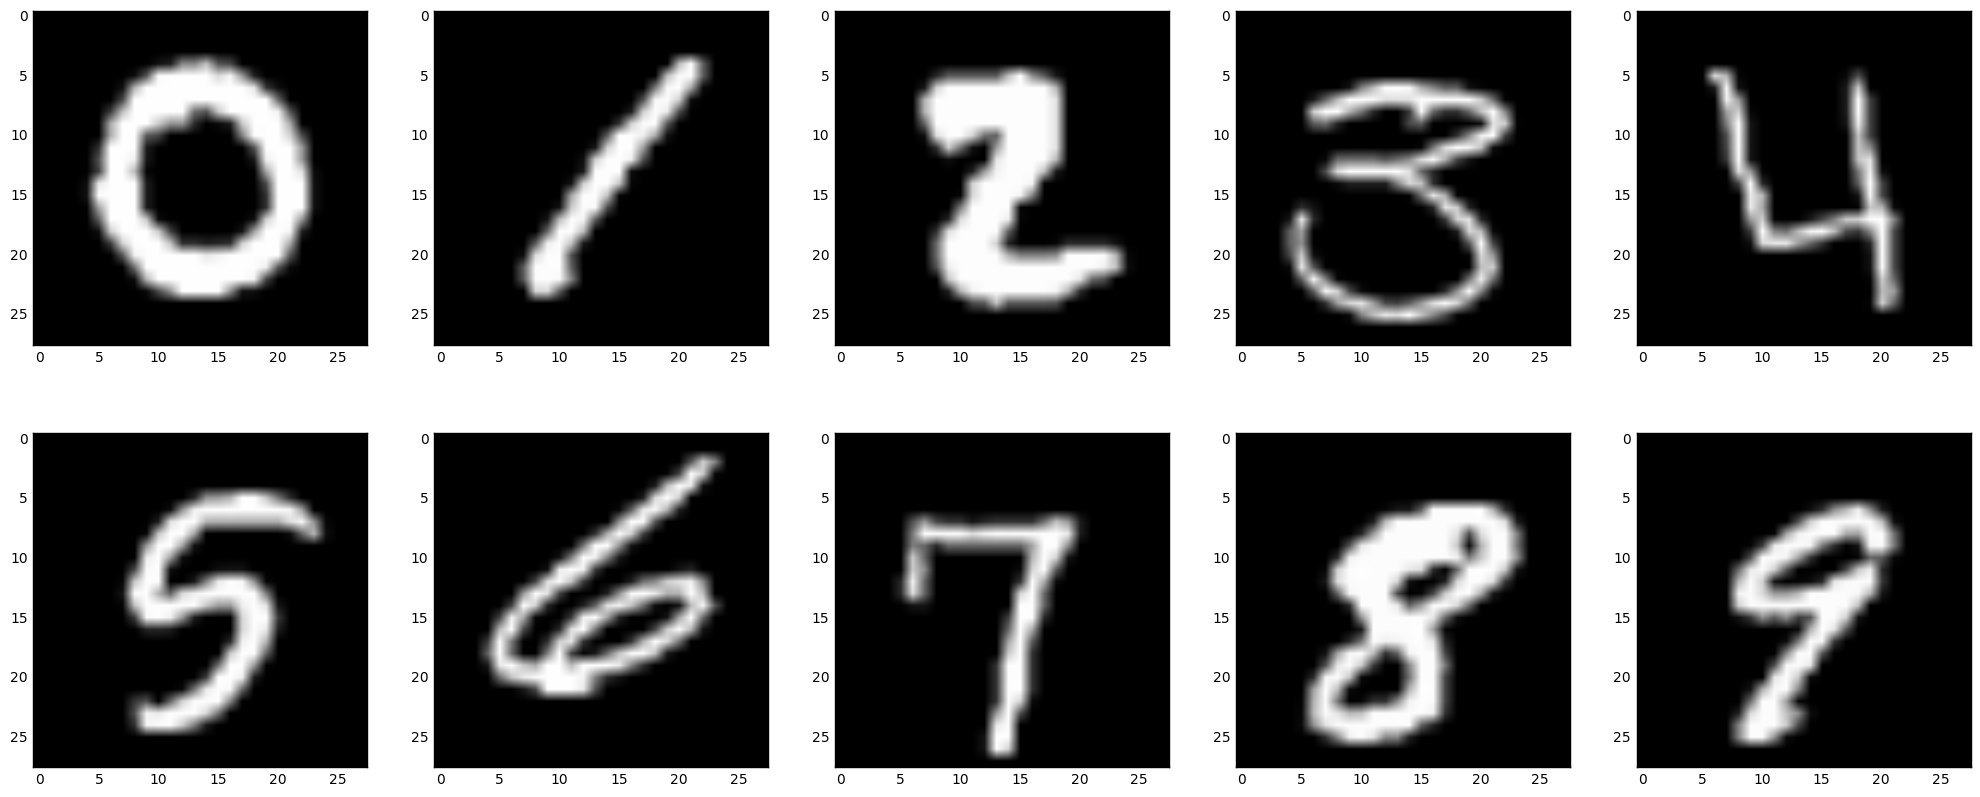

In [2]:
import scipy as sp
import pylab as plt
%matplotlib inline

plt.figure(figsize=(25, 10))

for i in range(10):
    my_arr = []
    j = 0
    while train_values[j] != i:
        j += 1
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_data[j], cmap='gray')

In [ ]:
# опишите, сколько признаков в выборке, сколько объектов. Каких типов признкаки и объекты?

В выборке 42000 объектов и 784 признака. Тип признаков - числа от 0 до 255, являющиеся градацией серого цвета.

In [ ]:
# нарисуйте среднее изображение, нарисуйте среднее изображение для каждой из цифр
# Прокомментируйте

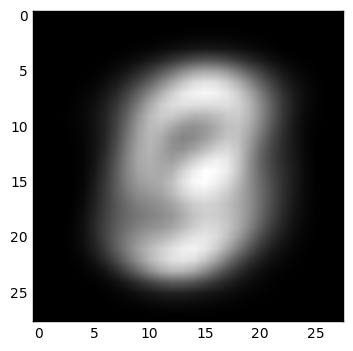

In [3]:
train_data_middle = np.zeros((28, 28))

for i in range(len(train_data)):
    train_data_middle = np.add(train_data_middle, train_data[i])

for a in range(28):
    for b in range(28):             
        train_data_middle[a][b] = train_data_middle[a][b] / len(train_data)

plt.imshow(train_data_middle, cmap='gray')

Можно заметить, что область в центре высветлена неравномерно и отдаленно напоминает восьмерку. Это потому, что в большинстве цифр линии идут как раз по этим контурам, и реже всего по затемненным зонам.

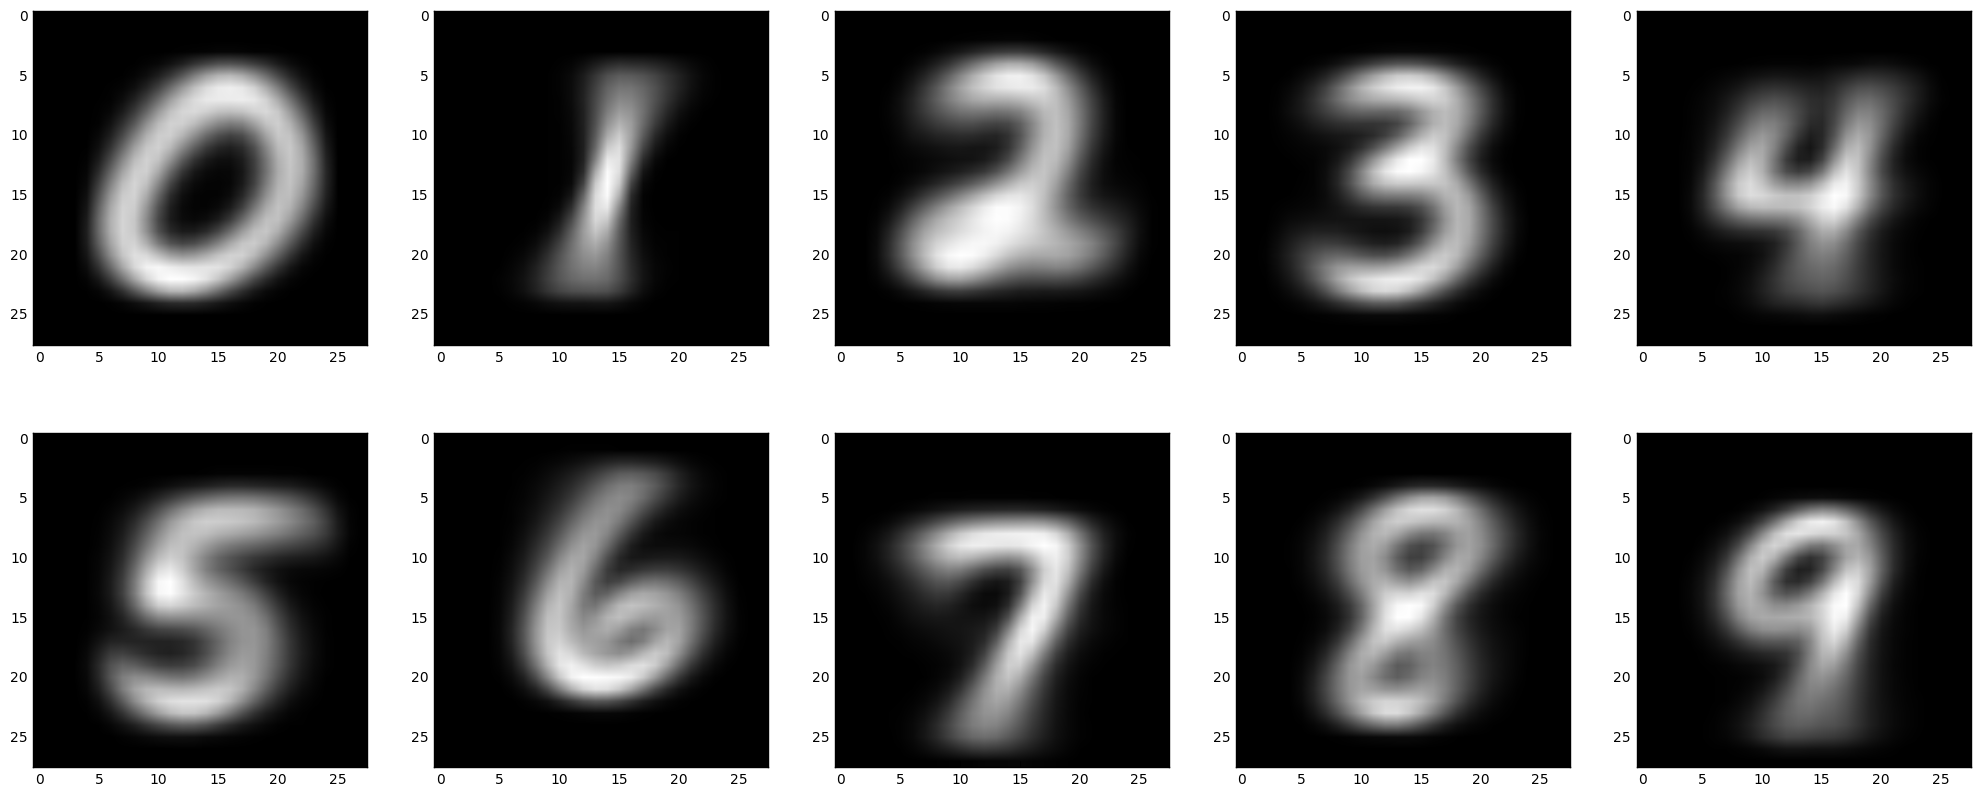

In [4]:
plt.figure(figsize=(25, 10))
count = 0

train_data_middle_separate = []

for j in range(10):
    train_data_middle_separate.append(np.zeros((28, 28)))
    quantity = 0
    for count in range(len(train_data)):
        if train_values[count] == j:
            train_data_middle_separate[j] = np.add(train_data_middle_separate[j], train_data[count])
            quantity += 1
    for a in range(28):
        for b in range(28):
            train_data_middle_separate[j][a][b] = train_data_middle_separate[j][a][b] / quantity
    plt.subplot(2, 5, j + 1)
    plt.imshow(train_data_middle_separate[j], cmap='gray')

Цифры получились узнаваемые, но слегка размытые, потому что все цифры в выборке разные и при наложении не могут давать четкой картинки.

In [ ]:
# нарисуйте 3 самых близких с среднему изображинию и 3 самых далеких от среднего изображений
# Прокомментируйте

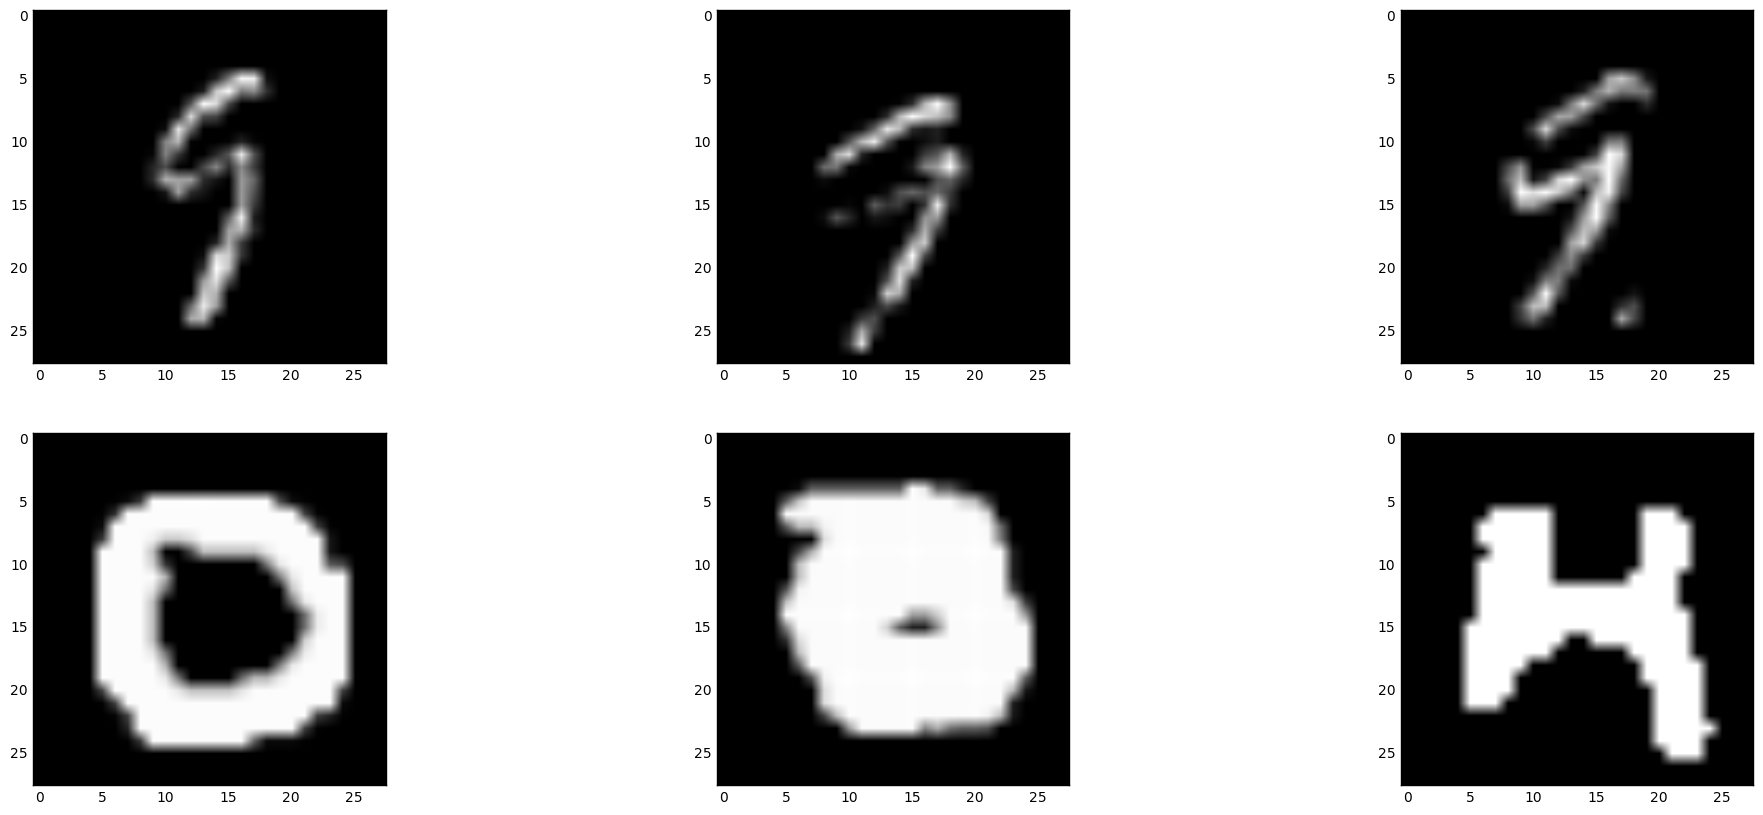

In [5]:
import copy

plt.figure(figsize=(25, 10))

norms_arr = []
for count in range(len(train_data)):
    norms_arr.append(train_data_middle - train_data[count])
for count in range(len(norms_arr)):
    norms_arr[count] = np.sum(np.square(norms_arr[count]))**0.5

norms_arr_min = copy.copy(norms_arr)
           
min1 = np.argmin(norms_arr_min)
norms_arr_min[min1] = float('+inf')
min1 = train_data[min1]
min2 = np.argmin(norms_arr_min)
norms_arr_min[min2] = float('+inf')
min2 = train_data[min2]
min3 = np.argmin(norms_arr_min)
min3 = train_data[min3]

norms_arr_max = copy.copy(norms_arr)
           
max1 = np.argmax(norms_arr_max)
norms_arr_max[max1] = float('-inf')
max1 = train_data[max1]
max2 = np.argmax(norms_arr_max)
norms_arr_max[max2] = float('-inf')
max2 = train_data[max2]
max3 = np.argmax(norms_arr_max)
max3 = train_data[max3]           

final_arr = [min1, min2, min3, max1, max2, max3]
for j in range(len(final_arr)):
    plt.subplot(2, 3, j+1)
    plt.imshow(final_arr[j], cmap='gray')

Можно заметить, что верхние изображения более тонкие и похожи на девятки, нижние же в основном нули, а также четверка, написаны жирно.

In [1]:
# повторите предыдущий пункт для каждой из цифр
# Прокомментируйте

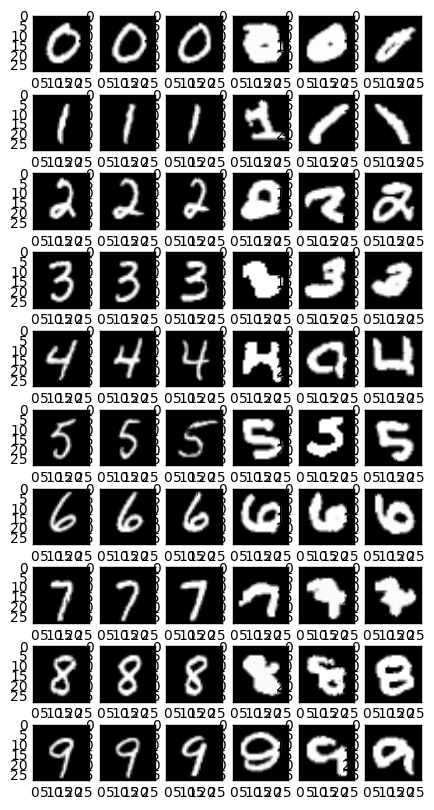

In [6]:
import copy

plt.figure(figsize=(5, 10))

for digit in range(len(train_data_middle_separate)):
    
    norms_arr = []
    for count in range(len(train_data)):
        norms_arr.append(train_data_middle_separate[digit] - train_data[count])
    for count in range(len(norms_arr)):
        norms_arr[count] = np.sum(np.square(norms_arr[count]))**0.5
    
    norms_arr_min = copy.copy(norms_arr)
    
    min1 = np.argmin(norms_arr_min)
    while train_values[min1] != digit:
            norms_arr_min[min1] = float('+inf')
            min1 = np.argmin(norms_arr_min)
    norms_arr_min[min1] = float('+inf')
    min1 = train_data[min1]
    min2 = np.argmin(norms_arr_min)
    while train_values[min2] != digit:
            norms_arr_min[min2] = float('+inf')
            min2 = np.argmin(norms_arr_min)
    norms_arr_min[min2] = float('+inf')
    min2 = train_data[min2]
    min3 = np.argmin(norms_arr_min)
    while train_values[min3] != digit:
            norms_arr_min[min3] = float('+inf')
            min3 = np.argmin(norms_arr_min)
    min3 = train_data[min3]

    norms_arr_max = copy.copy(norms_arr)

    max1 = np.argmax(norms_arr_max)
    while train_values[max1] != digit:
            norms_arr_max[max1] = float('-inf')
            max1 = np.argmax(norms_arr_max)
    norms_arr_max[max1] = float('-inf')
    max1 = train_data[max1]
    max2 = np.argmax(norms_arr_max)
    while train_values[max2] != digit:
            norms_arr_max[max2] = float('-inf')
            max2 = np.argmax(norms_arr_max)
    norms_arr_max[max2] = float('-inf')
    max2 = train_data[max2]
    max3 = np.argmax(norms_arr_max)
    while train_values[max3] != digit:
            norms_arr_max[max3] = float('-inf')
            max3 = np.argmax(norms_arr_max)
    max3 = train_data[max3]           
    
    
    final_arr = [min1, min2, min3, max1, max2, max3]
    for k in range(len(final_arr)):
        plt.subplot(10, 6, 6*digit + k + 1)
        plt.imshow(final_arr[k], cmap='gray')


Можно заметить, что цифры, более приближенные к эталону, выглядят четче и разборчивее, чем цифры, наиболее от него отдаленные. 
Также наиболее отдаленные цифры написаны жирнее.

In [ ]:
# разбейте выборку на две псевдослучайные подвыборки повторяемым образом (70:30)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_values, test_size=0.3, random_state=42)

In [ ]:
# Какая еще информация о данных кажется Вам важной?

Единицы в выборке в среднем представляют из себя палочки без "хвостов", а семерки в среднем написаны без "перегородки".